<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



<div class="alert alert-block alert-info">
    
## Table of Contents
***

- [Introduction](#intro) 
- [Data Wrangling](#wrang)
- [Data Visualization](#vis)
- [Statistical & Hypothesis Testing](#stat)
- [Conclusions](#conc)

</div>

<div class="alert alert-block alert-warning">
<a id="intro"></a>
    
# Introduction
</div>

***

## Project Case Scenario

**Project Scenario:** I am Data Scientist working with a housing agency in Boston MA. I have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on my experience in Statistics, what information can I provide them to help with making an informed decision? Upper management will like to get some insight into the following:

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
- 
Using the appropriate graphs and charts, I will generate basic statistics and visualizations that will be useful for the upper management to give them important insight given the question they are asking.

| Columns | Context |
|---------|---------|
| CRIM |per capita crime rate by town |
| ZN  |proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS |proportion of non-retail business acres per town.|
| CHAS  |Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
| NOX |nitric oxides concentration (parts per 10 million)|
|  RM |average number of rooms per dwelling|
|  AGE|proportion of owner-occupied units built prior to 1940|
|  DIS|weighted distances to five Boston employment centres|
|  RAD |index of accessibility to radial highways|
| TAX  |full-value property-tax rate per \$10,000|
| PTRATIO|pupil-teacher ratio by town|
| LSTAT |% lower status of the population|
|MEDV| Median value of owner-occupied homes in $1000's |


### Import the required libraries


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<a id="wrang"></a> 
<div class="alert alert-block alert-warning">
    
# Data Wrangling
</div>

***

In [6]:
boston_df.drop("Unnamed: 0", axis=1, inplace=True)
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

We have 506 records for all features. There are no missing or "Nan" values. .

In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


We can notice that homes median prices MEDV range from \\\$5 to $50000.

### Features correlated with Home Median Values

In [12]:
cor_df= pd.DataFrame(boston_df.corr()['MEDV'].sort_values())
cor_df=cor_df.rename(columns={'MEDV': 'R'})
cor_df

,R
LSTAT,-0.737663
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.388305
RAD,-0.381626
AGE,-0.376955
CHAS,0.175260
DIS,0.249929


The table displays Person correlation coefficient R of all features with median home price (MEDV)

Median prices MEDV increases with increasing:
- RM (average number of rooms per dwelling)
- ZN (proportion of residential land zoned for lots over 25,000 sq.ft)
- DIS (weighted distances to five Boston employment centres)
- Town areas bounded to Charles River are slighty positively correlated with median home prices MEDV.

Median prices MEDV increases with decreasing:
- LSTAT (% lower status of the population)
- PTRATIO (pupil-teacher ratio)
- INDUS (proportion of non-retail business acres per town)
- NOX (nitric oxides concentration)
- TAX (full-value property-tax rate per $10,000)
- CRIM (per capita crime rate by town)
- RAD (index of accessibility to radial highways)
- AGE (proportion of owner-occupied units built prior to 1940)

These results shows wealthy areas with low crime, private schools with low PTRATIO, low pollution, low % of lower status population.

<div class="alert alert-block alert-warning">
<a id="vis"></a>
    
# Data Visualization
</div>

***

##  Boxplot for Median of owner-occupied homes

In [16]:
median_age= boston_df["MEDV"].median()
print(f"Median of owner-occupied homes = {median_age}")

Median of owner-occupied homes = 21.2


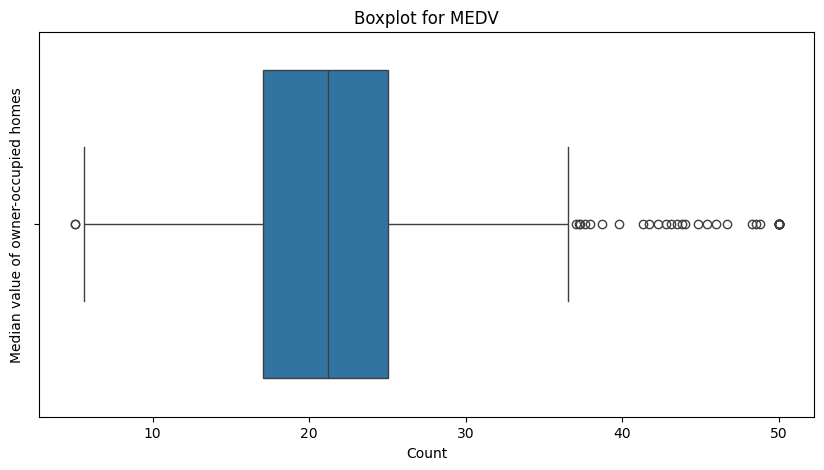

In [17]:
plt.figure(figsize= (10, 5))
ax= sns.boxplot(x= "MEDV", data= boston_df)
plt.xlabel("Count")
plt.ylabel("Median value of owner-occupied homes")
plt.title("Boxplot for MEDV")
plt.show()

The median is $21200 and there are many outliers making the skewed to the right. 

## Barplot for the Charles river

In [18]:
chas= boston_df["CHAS"].unique()

In [19]:
count= boston_df["CHAS"].value_counts().values
print(f"""Not bound to Charles River: {count[0]}
Bound to Charles River: {count[1]}""")

Not bound to Charles River: 471
Bound to Charles River: 35


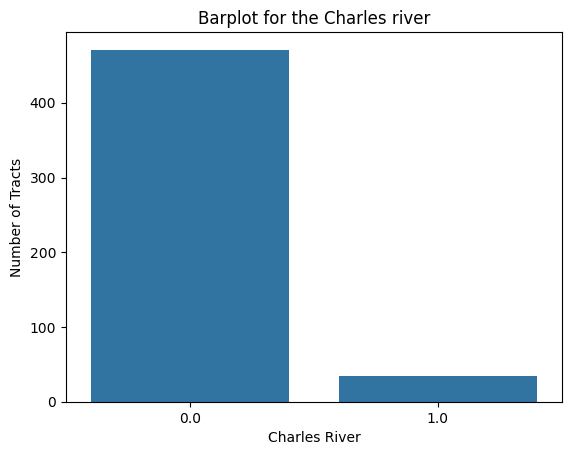

In [21]:
ax= sns.barplot(x= chas, y=count)
plt.xlabel("Charles River")
plt.ylabel("Number of Tracts")
plt.title("Barplot for the Charles river")
plt.show()

##### Majority tracts are not bounded to Charles River with 93%

## Boxplot for the MEDV vs the AGE

Discretizing the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.

In [22]:
boston_df.loc[(boston_df["AGE"] <= 35), "age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"] < 70), "age_group"] = "between 35 and 70 years"
boston_df.loc[(boston_df["AGE"] >= 70), "age_group"] = "70 years and older"

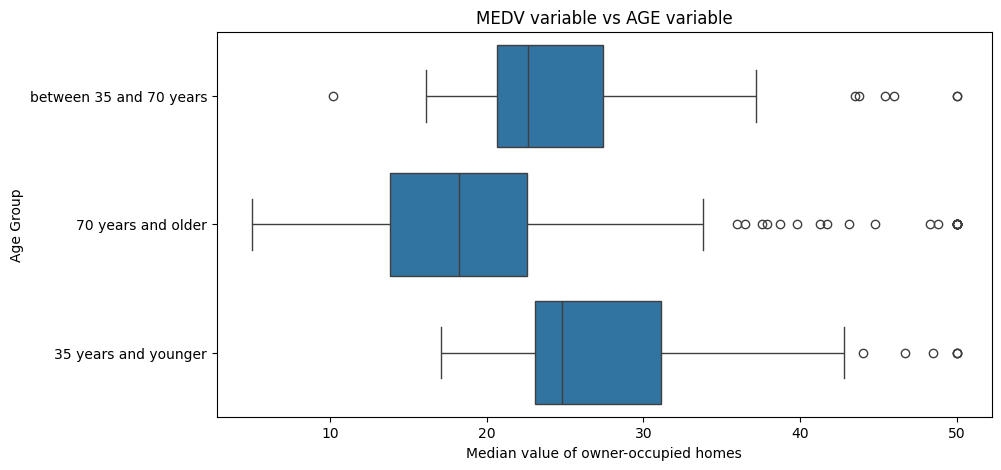

In [23]:
plt.figure(figsize= (10,5))
ax= sns.boxplot(x= "MEDV", y= "age_group", data= boston_df)
plt.title("MEDV variable vs AGE variable")
plt.xlabel("Median value of owner-occupied homes")
plt.ylabel("Age Group")
plt.show()

##### 35 years or younger group pays the highest median house price while above 70s are shifting to cheaper houses

## Scatterplot for NOX and INDUS

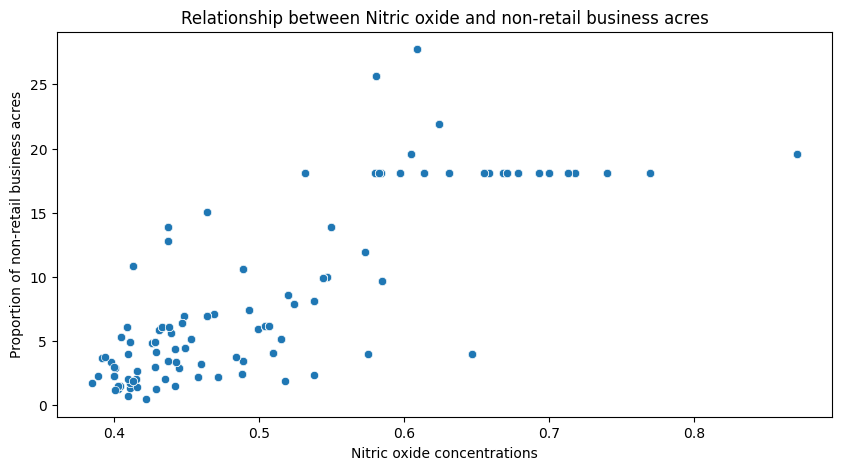

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x= "NOX", y= "INDUS", data= boston_df)
plt.title("Relationship between Nitric oxide and non-retail business acres")
plt.xlabel("Nitric oxide concentrations")
plt.ylabel("Proportion of non-retail business acres")
plt.show()

There seems to be a linear positive relationship between NOX vs INDUS until NOX=0.6



## Histogram for the pupil to teacher ratio

<Figure size 1000x500 with 0 Axes>

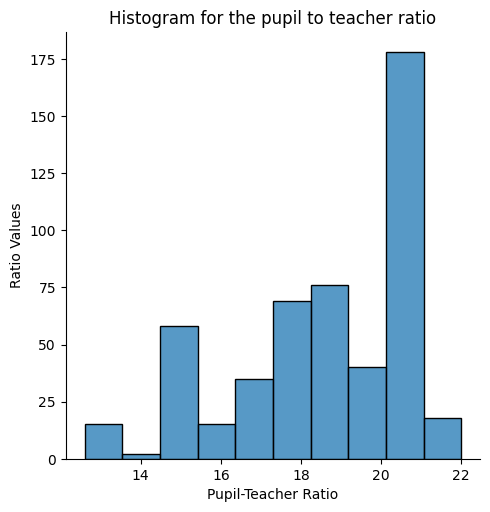

In [25]:
plt.figure(figsize=(10,5))
sns.displot(x="PTRATIO", bins=10, data= boston_df, kde= False)
plt.title("Histogram for the pupil to teacher ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Ratio Values")
plt.show()

Pupil to teacher ratio is highest at 20-21 range. We know that PTRATIO is negatively and strongly correlated with MEDV. Therefore a high proportion of expensive house MEDV is linked to low PTRATIO.

The distribution is skewed to the left. It is possible that low ratio is linked to private schools in wealthy areas

<div class="alert alert-block alert-warning">
<a id="stat"></a>
    
# Statistical and Hypothesis Testing

</div>

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

***

**Null Hypothesis ($H0$)** : $µ1 = µ2$   (Both average MEDV are the same)

**Alternative Hypothesis ($H1$)** : $µ1 ≠ µ2$   (Both average MEDV are NOT the same)

In [26]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [27]:
not_charles= boston_df[boston_df["CHAS"] == 0]["MEDV"]
charles= boston_df[boston_df["CHAS"] == 1]["MEDV"]

In [28]:
stat,p= scipy.stats.levene(not_charles, charles, center='mean')
print(f"Test statistic {round(stat, 3)}")  
print(f"p-value {round(p, 3)}") 

Test statistic 8.752
p-value 0.003


Since the p-value < 0.05, we reject $H0$ hypothesis and can't assume equality of variance

In [29]:
stat,p= scipy.stats.ttest_ind(not_charles, charles ,axis=0, equal_var=False)
print(f"Test statistic {round(stat, 3)}")  
print(f"p-value {round(p, 3)}") 

Test statistic -3.113
p-value 0.004


The p-value < 0.05/2 (2-tailed, alpha= 0.05), we reject $H0$ hypothesis and there is enough evidence to prove that the averages are not equal.

**Conclusions:** Areas bounded by the Charles river have homes with higher median prices.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
***

In [30]:
ag1=boston_df[boston_df['age_group'] == "35 years and younger"]['MEDV']
ag2=boston_df[boston_df['age_group'] == "between 35 and 70 years"]['MEDV']
ag3=boston_df[boston_df['age_group'] == "70 years and older"]['MEDV']

**Null Hypothesis ($H0$)** : $µ1 = µ2 = µ3$   (the three data samples means are equal)

**Alternative Hypothesis ($H1$)** : At least one of the means differ

In [31]:
stat, p = scipy.stats.levene(ag1, ag2, ag3, center='mean')
print(f"Test statistic {round(stat, 3)}")  
print(f"p-value {round(p, 3)}") 

Test statistic 2.781
p-value 0.063


The p-value > 0.05, we failed to reject $H0$ and the variances of all 3 samples are almost equal. We can run the One Way ANOVA test.

In [32]:
f_statistic, p_value = scipy.stats.f_oneway(ag1, ag2, ag3)

print(f"Test statistic {round(f_statistic, 3)}")  
print(f"p-value {p_value}")

Test statistic 36.408
p-value 1.7105011022702984e-15


Since the p-value < 0.05, we reject $H0$ hypothesis 
, and there is enough evidence to support that the mean values of at least 2 groups are not equal.

AGE has an impact on mean prices (MEDV). This result was visible in the boxplot. The test does not say much about the numerous outliers in 70 years and older (higher rate of old houses).

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
***

**Null Hypothesis($H0$)**: Nitric oxide concentrations is not correlated with non-retail business acres per town.

**Alternative Hypothesis($H1$)**: Nitric oxide concentrations is correlated with non-retail business acres per town.

In [33]:
stat, p = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Test statistic {round(stat, 3)}")  
print(f"p-value {p}") 

Test statistic 0.764
p-value 7.913361061210442e-98


Since p-value < 0.05, we reject $H0$ hypothesis, and conclude that NOX and INDUS are linearly correlated with correlation coefficient R= 0.764

In [34]:
X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X.to_numpy()) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           7.91e-98
Time:                        00:40:04   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
x1             0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(f'Correlation coefficient R = {round(np.sqrt(0.583), 3)}')

Correlation coefficient R = 0.764


Both correlation coefficients are identical.

**Conclusion:** NOX is strongly correlated with INDUS. R=0.765. Since R>0, Nox increases with INDUS variable (increasing industrial land acres per town.)

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
***

**Null Hypothesis ($H0$)** :  Homes median prices are independent of DIS variable

**Alternative Hypothesis ($H1$)** : Homes median prices are dependent on DIS variable

In [36]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X.to_numpy()) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        00:40:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
x1             1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(f'Correlation coefficient R = {round(np.sqrt(0.062), 3)}')

Correlation coefficient R = 0.249


Since p-value of F-Statistics < 0.05, we reject $H0$ hypothesis 

We conclude that there is MEDV is dependent on DIS/ DIS has an impact on MEDV. MEDV tends to increases, as distance to employment centers increases.

Nevertheless assuming a linear regression, the correlation factor R=0.25 is relatively low.

#### Trying a Peason correlation test. We expect to find similar results.

In [38]:
stat, p = scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])
print(f"Pearson Test statistic = {round(stat, 3)}")  
print(f"p-value = {p}") 

Pearson Test statistic = 0.25
p-value = 1.2066117273371074e-08


**Conclusion**: Since the p-value < 0.05, we reject the $H0$ hypothesis and conclude that there DIS variable has a weak positive impact on MEDV.

<a id="conc"></a>
<div class="alert alert-block alert-warning">
    
## CONCLUSIONS

</div>

***

Using descriptive statistics and statistical tests we can conclude that:

- There a significant difference in median value of houses bounded by the Charles river.
- Age has a significant negative impact on Median values of houses (MEDV). But it is not the only factor.
- There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 
- There is an influence of the weighted distance to the five Boston employment centres on the median value of owner occupied homes, but it is mild. It is possible that these employment centers were located downtown, in office buildings areas.

# Author

- [Parshv Patel](#name)